In [1]:
!pip3 install /Users/kpierce/geocode-tools

Processing /Users/kpierce/geocode-tools
  Preparing metadata (setup.py) ... done
  Created wheel for geocodetools: filename=geocodetools-0.1.1-py3-none-any.whl size=5875 sha256=67fc072962d268e308c24580278794264af35218ce105cd4796e4dca82846c60
  Stored in directory: /Users/kpierce/Library/Caches/pip/wheels/ac/b8/12/32bae614a2cc98de3b3a08879686ea363b71e448208d759d49
Successfully built geocodetools
  Attempting uninstall: geocodetools
    Found existing installation: geocodetools 0.1.1
    Uninstalling geocodetools-0.1.1:
      Successfully uninstalled geocodetools-0.1.1
You should consider upgrading via the '/Users/kpierce/epimodels/epi-venv/bin/python -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
from geocodetools import address_validator, geocode
import rpy2.robjects as ro
from rpy2.robjects import r, pandas2ri
from rpy2.robjects.packages import importr
pandas2ri.activate()

In [2]:
import logging
import sys
logger = logging.getLogger('geocodetools')
logger.setLevel('INFO')
logger.addHandler(logging.StreamHandler(stream=sys.stdout))


## Phase 1: Attempt geocoding

In [18]:
hosp = pd.read_csv('AustinHospitals.csv')

In [19]:
hosp

,ShortName,FullName,full_address,address,city,state,zipcode
0,BAYLOR SCOTT & WHITE MEDICAL CENTER - AUSTIN,"Baylor, Scott and White Medical Center - Austin",5245 W US Hwy 290 Austin TX 78735,5245 W US Hwy 290,Austin,TX,78735
1,DCMC,Dell Children's Medical Center,4900 Mueller Rd Austin TX 78723,4900 Mueller Rd,Austin,TX,78723
2,DSMCUT,"Dell Seton Medical Center, UT",1500 Red River St Austin TX 78701,1500 Red River St,Austin,TX,78701
3,Heart Hospital of Austin,Heart Hospital of Austin,3801 N Lamar Blvd Austin TX 78756,3801 N Lamar Blvd,Austin,TX,78756
4,SMCA,Seton Medical Center - Austin,1201 W 38th St Austin 78705,1201 W 38th St,Austin,TX,78705
5,SNW,Seton Medical Center - Northwest Austin,11113 Research Blvd Austin TX 78759,11113 Research Blvd,Austin,TX,78759
6,SSW,Seton Medical Center - Southwest Austin,7900 FM 1826 Austin TX 78737,7900 FM 1826,Austin,TX,78737
7,St. David's Medical Center,St. David's Medical Center,919 E 32nd St Austin TX 78705,919 E 32nd St,Austin,TX,78705
8,St. David's North Austin Medical Center,St. David's North Austin Medical Center,12221 N MOPAC Expwy Austin TX 78758,12221 N MOPAC Expwy,Austin,TX,78758
9,St. David's South Austin Medical Center,St. David's South Austin Medical Center,901 W Ben White Blvd Austin TX 78704,901 W Ben White Blvd,Austin,TX,78704


In [20]:
r_tibble = geocode.load_as_tibble()
r_geocode = geocode.load_geocode()
r_hosp = pandas2ri.py2rpy(hosp)

In [23]:
r_gc = r_geocode(
    r_hosp,
    address='full_address',
    method='census',
    full_results=True,
    return_type='geographies'
)

R[write to console]: Passing 10 addresses to the US Census batch geocoder

R[write to console]: Query completed in: 2.5 seconds



In [24]:
r_gc

,ShortName,FullName,full_address,address,city,state,zipcode,lat,long,id,input_address,match_indicator,match_type,matched_address,tiger_line_id,tiger_side,state_fips,county_fips,census_tract,census_block
1,BAYLOR SCOTT & WHITE MEDICAL CENTER - AUSTIN,"Baylor, Scott and White Medical Center - Austin",5245 W US Hwy 290 Austin TX 78735,5245 W US Hwy 290,Austin,TX,78735,NaN,NaN,1,"5245 W US Hwy 290 Austin TX 78735, , ,",No_Match,None,None,None,None,None,None,None,None
2,DCMC,Dell Children's Medical Center,4900 Mueller Rd Austin TX 78723,4900 Mueller Rd,Austin,TX,78723,30.301311,-97.705740,2,"4900 Mueller Rd Austin TX 78723, , ,",Match,Non_Exact,"4900 MUELLER BLVD, AUSTIN, TX, 78723",649002685,L,48,453,000309,3007
3,DSMCUT,"Dell Seton Medical Center, UT",1500 Red River St Austin TX 78701,1500 Red River St,Austin,TX,78701,30.275553,-97.734436,3,"1500 Red River St Austin TX 78701, , ,",Match,Non_Exact,"1500 RED RIVER ST, AUSTIN, TX, 78712",642470981,L,48,453,000700,1002
4,Heart Hospital of Austin,Heart Hospital of Austin,3801 N Lamar Blvd Austin TX 78756,3801 N Lamar Blvd,Austin,TX,78756,30.306576,-97.742190,4,"3801 N Lamar Blvd Austin TX 78756, , ,",Match,Exact,"3801 N LAMAR BLVD, AUSTIN, TX, 78756",639535055,R,48,453,000203,1000
5,SMCA,Seton Medical Center - Austin,1201 W 38th St Austin 78705,1201 W 38th St,Austin,TX,78705,30.306044,-97.744965,5,"1201 W 38th St Austin 78705, , ,",Match,Exact,"1201 W 38TH ST, AUSTIN, TX, 78705",63942423,L,48,453,000204,3025
6,SNW,Seton Medical Center - Northwest Austin,11113 Research Blvd Austin TX 78759,11113 Research Blvd,Austin,TX,78759,NaN,NaN,6,"11113 Research Blvd Austin TX 78759, , ,",No_Match,None,None,None,None,None,None,None,None
7,SSW,Seton Medical Center - Southwest Austin,7900 FM 1826 Austin TX 78737,7900 FM 1826,Austin,TX,78737,30.228003,-97.888870,7,"7900 FM 1826 Austin TX 78737, , ,",Match,Exact,"7900 FM 1826, AUSTIN, TX, 78737",642470446,R,48,453,031100,2000
8,St. David's Medical Center,St. David's Medical Center,919 E 32nd St Austin TX 78705,919 E 32nd St,Austin,TX,78705,30.290806,-97.726640,8,"919 E 32nd St Austin TX 78705, , ,",Match,Exact,"919 E 32ND ST, AUSTIN, TX, 78705",63946097,R,48,453,000401,3013
9,St. David's North Austin Medical Center,St. David's North Austin Medical Center,12221 N MOPAC Expwy Austin TX 78758,12221 N MOPAC Expwy,Austin,TX,78758,30.412596,-97.707660,9,"12221 N MOPAC Expwy Austin TX 78758, , ,",Match,Exact,"12221 N MOPAC EXPY, AUSTIN, TX, 78758",63969110,L,48,453,042200,1005
10,St. David's South Austin Medical Center,St. David's South Austin Medical Center,901 W Ben White Blvd Austin TX 78704,901 W Ben White Blvd,Austin,TX,78704,30.227312,-97.773720,10,"901 W Ben White Blvd Austin TX 78704, , ,",Match,Exact,"901 W BEN WHITE BLVD, AUSTIN, TX, 78704",64123044,L,48,453,002003,1002


## Phase 2: Validate unmatched addresses

In [25]:
r_gc_redo = r_gc[r_gc['match_indicator'] != 'Match']
usps_cred = address_validator.load_credentials()

In [26]:
r_gc_redo['zipcode'] = r_gc_redo['zipcode'].astype(str)
r_gc_redo_dict = r_gc_redo[['address', 'city', 'state', 'zipcode']].to_dict(orient='records')

/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_48899/1707543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_gc_redo['zipcode'] = r_gc_redo['zipcode'].astype(str)


In [27]:
r_gc_redo_dict

[{'address': '5245 W US Hwy 290',
  'city': 'Austin',
  'state': 'TX',
  'zipcode': '78735'},
 {'address': '11113 Research Blvd',
  'city': 'Austin',
  'state': 'TX',
  'zipcode': '78759'}]

In [28]:
validated_addr = []
for i in r_gc_redo_dict:
    print(i)
    val = address_validator.validate(i, usps_cred)
    validated_addr.append(val)

{'address': '5245 W US Hwy 290', 'city': 'Austin', 'state': 'TX', 'zipcode': '78735'}
{'address': '11113 Research Blvd', 'city': 'Austin', 'state': 'TX', 'zipcode': '78759'}


In [29]:
validated_addr

[{'address': '5245 W HIGHWAY 290', 'city': 'AUSTIN', 'zip_code': '78735-8963'},
 {'address': '11113 RESEARCH BLVD',
  'city': 'AUSTIN',
  'zip_code': '78759-5236'}]

In [30]:
validated_addr_df = pd.DataFrame(validated_addr)

In [31]:
validated_addr_df

,address,city,zip_code
0,5245 W HIGHWAY 290,AUSTIN,78735-8963
1,11113 RESEARCH BLVD,AUSTIN,78759-5236


In [32]:
r_hosp_val = pandas2ri.py2rpy(validated_addr_df)

In [33]:
r_gc_val = r_geocode(
    r_hosp_val,
    street='address',
    city='city',
    postalcode='zip_code',
    method='census',
    full_results=True,
    return_type='geographies'
)

R[write to console]: Passing 2 addresses to the US Census batch geocoder

R[write to console]: Query completed in: 4 seconds



In [34]:
r_gc_val

,address,city,zip_code,lat,long,id,input_address,match_indicator,match_type,matched_address,tiger_line_id,tiger_side,state_fips,county_fips,census_tract,census_block
1,5245 W HIGHWAY 290,AUSTIN,78735-8963,NaN,NaN,1,"5245 W HIGHWAY 290, AUSTIN, , 78735-8963",No_Match,None,None,None,None,None,None,None,None
2,11113 RESEARCH BLVD,AUSTIN,78759-5236,NaN,NaN,2,"11113 RESEARCH BLVD, AUSTIN, , 78759-5236",No_Match,None,None,None,None,None,None,None,None


Alternative addresses for Baylor, Scott and White:
- Hwy 290 and Hwy 71 are the same road in this part of town
- Another source I found listed 78749 as the zip code

In [35]:
alt_addr = [
    {'address': '5245 W HIGHWAY 71', 'city': 'AUSTIN', 'zip_code': '78735-8963'},
    {'address': '5245 W HIGHWAY 71', 'city': 'AUSTIN', 'zip_code': '78749'},
    {'address': '5245 W HIGHWAY 290', 'city': 'AUSTIN', 'zip_code': '78749'}
]
r_alt = pandas2ri.py2rpy(pd.DataFrame(alt_addr))
r_gc_alt = r_geocode(
    r_alt,
    street='address',
    city='city',
    postalcode='zip_code',
    method='census',
    full_results=True,
    return_type='geographies'
)

R[write to console]: Passing 3 addresses to the US Census batch geocoder

R[write to console]: Query completed in: 5.3 seconds



In [36]:
r_gc_alt

,address,city,zip_code,lat,long,id,input_address,match_indicator,match_type,matched_address,tiger_line_id,tiger_side,state_fips,county_fips,census_tract,census_block
1,5245 W HIGHWAY 71,AUSTIN,78735-8963,NaN,NaN,1,"5245 W HIGHWAY 71, AUSTIN, , 78735-8963",No_Match,None,None,None,None,None,None,None,None
2,5245 W HIGHWAY 71,AUSTIN,78749,NaN,NaN,2,"5245 W HIGHWAY 71, AUSTIN, , 78749",No_Match,None,None,None,None,None,None,None,None
3,5245 W HIGHWAY 290,AUSTIN,78749,NaN,NaN,3,"5245 W HIGHWAY 290, AUSTIN, , 78749",No_Match,None,None,None,None,None,None,None,None


### Geocoding the hard way:

Google Maps provides latitude and longitude coordinates when you right-click on a location. Google Maps displays in EPSG:3857, but shows lat/lon coords in EPSG:4326 according to Bjorn Svensson on 2 April 2013. Thank you Bjorn for your service to documenting things Google does not. https://gis.stackexchange.com/questions/56862/what-spatial-reference-system-do-i-store-google-maps-lat-lng-in

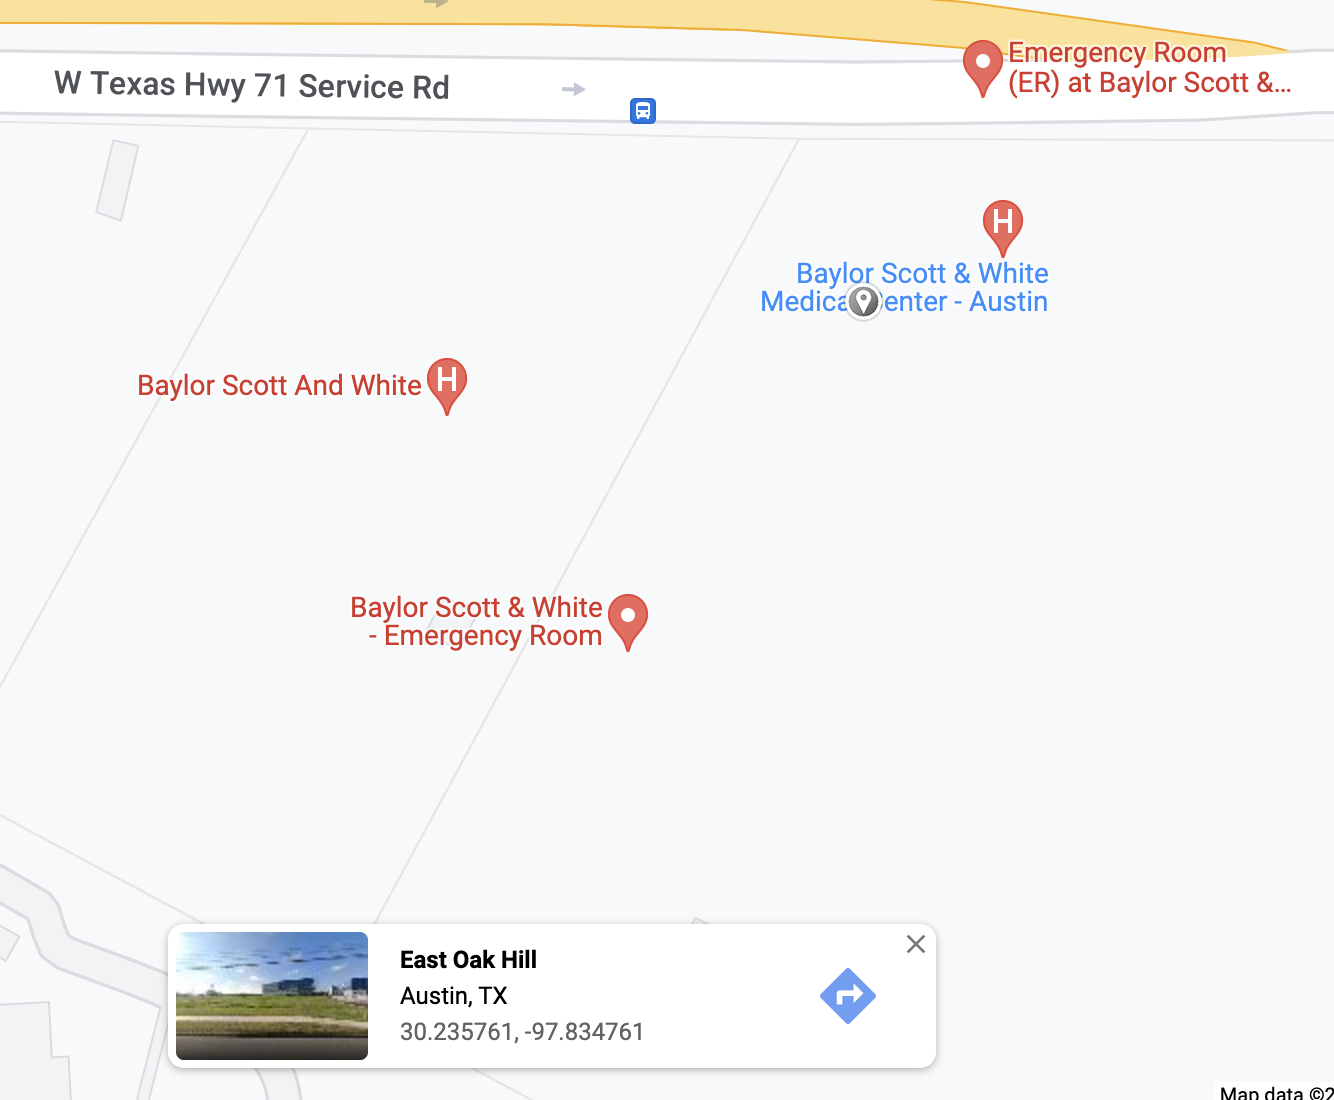

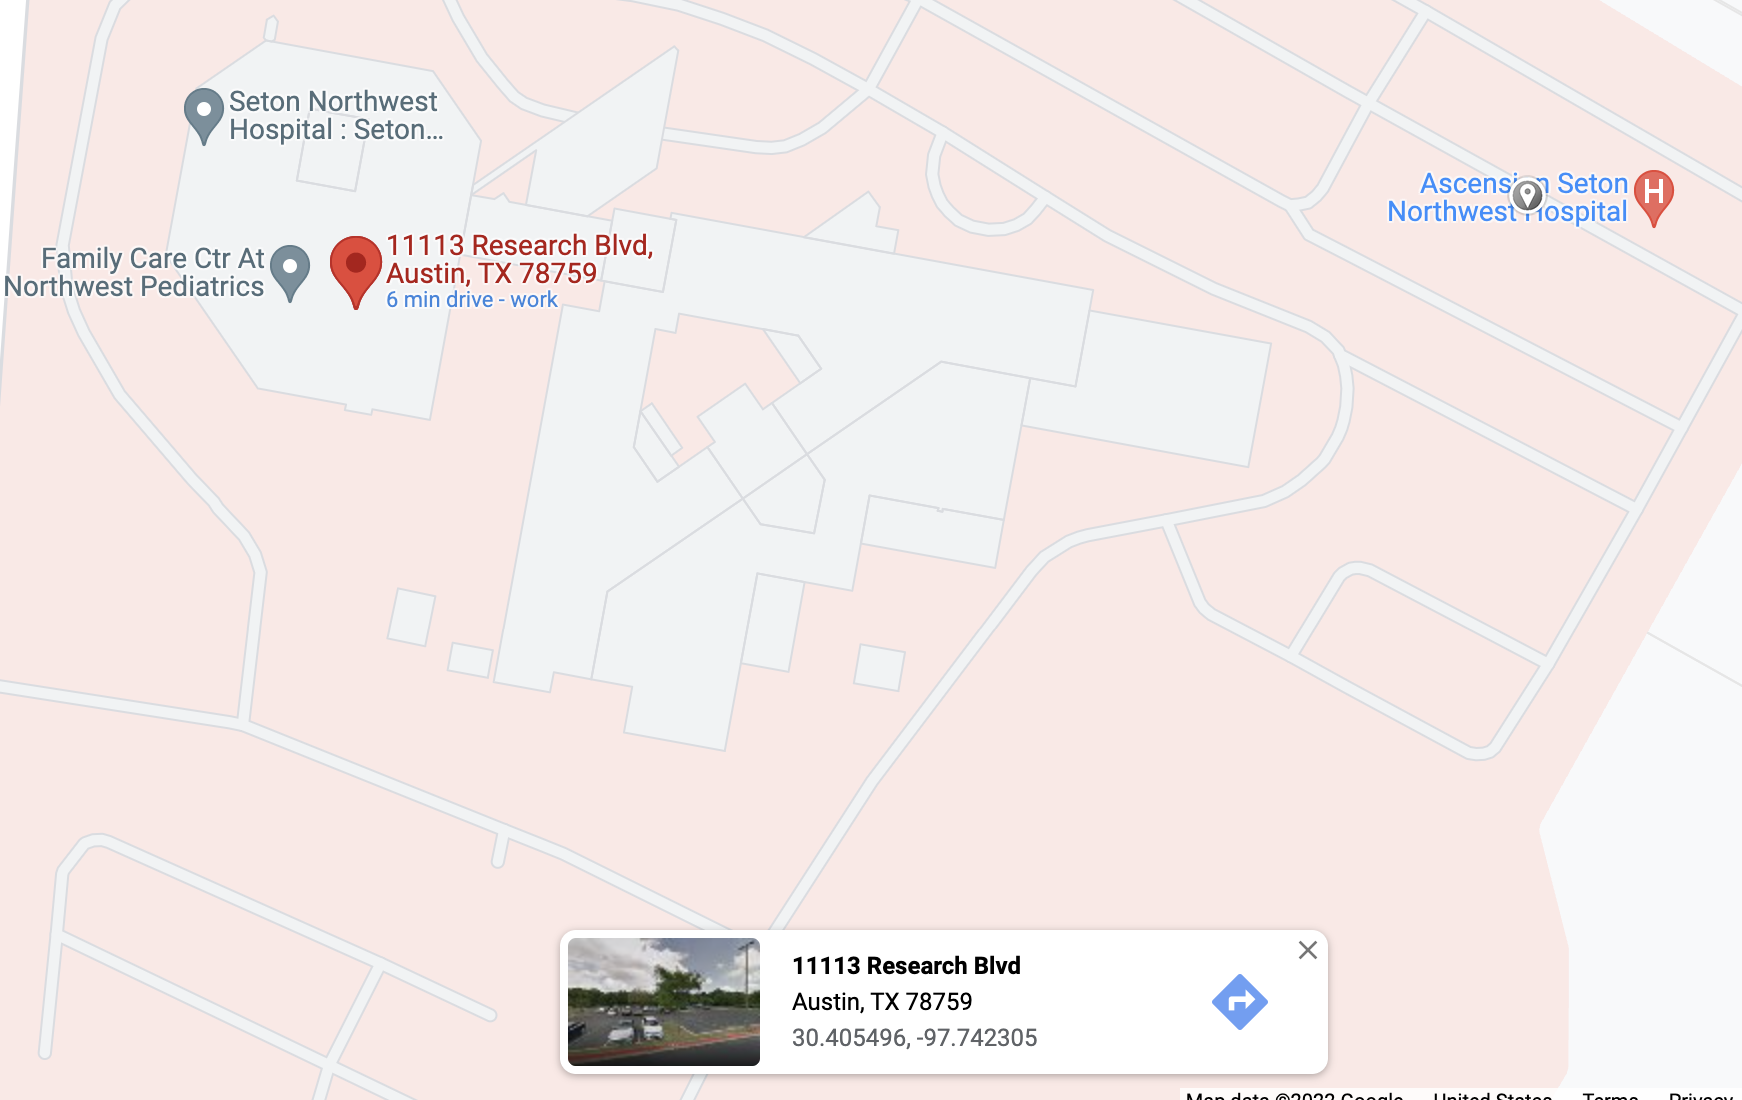

In [37]:
manual_coords = pd.DataFrame([
    {'ShortName': 'BAYLOR SCOTT & WHITE MEDICAL CENTER - AUSTIN', 
     'FullName': 'Baylor, Scott and White Medical Center - Austin',
     'full_address': '5245 W US Hwy 290 Austin TX 78735',
     'match_type': 'manual',
     'address': '5245 W US Hwy 290', 'city': 'Austin', 'state': 'TX', 'zipcode': '78735', 
     'lat':30.235761, 'long':-97.834761},
    {'ShortName': 'SNW', 'FullName': 'Seton Medical Center - Northwest Austin',
     'full_address': '11113 Research Blvd Austin TX 78759',
     'match_type': 'manual',
     'address': '11113 Research Blvd', 'city': 'Austin', 'state': 'TX', 'zipcode': '78759',
     'lat':30.4054496, 'long': -97.742305}
])

In [3]:
import geopandas as gpd

/Users/kpierce/epimodels/epi-venv/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


The US Census Bureau geocoder returns coordinates in NAD83 CRS (EPSG:4269).

In [39]:
r_gc_gdf = gpd.GeoDataFrame(
    r_gc,
    geometry=gpd.points_from_xy(r_gc['long'], r_gc['lat']),
    crs='EPSG:4269')

In [40]:
manual_coords_gdf = gpd.GeoDataFrame(
    manual_coords,
    geometry=gpd.points_from_xy(manual_coords['long'], manual_coords['lat']),
    crs='EPSG:4326'
)

In [41]:
manual_coords_gdf_nad83 = manual_coords_gdf.to_crs('EPSG:4269')

In [42]:
all_coords = pd.concat([r_gc_gdf, manual_coords_gdf]).dropna(subset=['lat'])

In [43]:
all_coords

,ShortName,FullName,full_address,address,city,state,zipcode,lat,long,id,...,match_indicator,match_type,matched_address,tiger_line_id,tiger_side,state_fips,county_fips,census_tract,census_block,geometry
2,DCMC,Dell Children's Medical Center,4900 Mueller Rd Austin TX 78723,4900 Mueller Rd,Austin,TX,78723,30.301311,-97.705740,2.0,...,Match,Non_Exact,"4900 MUELLER BLVD, AUSTIN, TX, 78723",649002685,L,48,453,000309,3007,POINT (-97.70574 30.30131)
3,DSMCUT,"Dell Seton Medical Center, UT",1500 Red River St Austin TX 78701,1500 Red River St,Austin,TX,78701,30.275553,-97.734436,3.0,...,Match,Non_Exact,"1500 RED RIVER ST, AUSTIN, TX, 78712",642470981,L,48,453,000700,1002,POINT (-97.73444 30.27555)
4,Heart Hospital of Austin,Heart Hospital of Austin,3801 N Lamar Blvd Austin TX 78756,3801 N Lamar Blvd,Austin,TX,78756,30.306576,-97.742190,4.0,...,Match,Exact,"3801 N LAMAR BLVD, AUSTIN, TX, 78756",639535055,R,48,453,000203,1000,POINT (-97.74219 30.30658)
5,SMCA,Seton Medical Center - Austin,1201 W 38th St Austin 78705,1201 W 38th St,Austin,TX,78705,30.306044,-97.744965,5.0,...,Match,Exact,"1201 W 38TH ST, AUSTIN, TX, 78705",63942423,L,48,453,000204,3025,POINT (-97.74496 30.30604)
7,SSW,Seton Medical Center - Southwest Austin,7900 FM 1826 Austin TX 78737,7900 FM 1826,Austin,TX,78737,30.228003,-97.888870,7.0,...,Match,Exact,"7900 FM 1826, AUSTIN, TX, 78737",642470446,R,48,453,031100,2000,POINT (-97.88887 30.22800)
8,St. David's Medical Center,St. David's Medical Center,919 E 32nd St Austin TX 78705,919 E 32nd St,Austin,TX,78705,30.290806,-97.726640,8.0,...,Match,Exact,"919 E 32ND ST, AUSTIN, TX, 78705",63946097,R,48,453,000401,3013,POINT (-97.72664 30.29081)
9,St. David's North Austin Medical Center,St. David's North Austin Medical Center,12221 N MOPAC Expwy Austin TX 78758,12221 N MOPAC Expwy,Austin,TX,78758,30.412596,-97.707660,9.0,...,Match,Exact,"12221 N MOPAC EXPY, AUSTIN, TX, 78758",63969110,L,48,453,042200,1005,POINT (-97.70766 30.41260)
10,St. David's South Austin Medical Center,St. David's South Austin Medical Center,901 W Ben White Blvd Austin TX 78704,901 W Ben White Blvd,Austin,TX,78704,30.227312,-97.773720,10.0,...,Match,Exact,"901 W BEN WHITE BLVD, AUSTIN, TX, 78704",64123044,L,48,453,002003,1002,POINT (-97.77372 30.22731)
0,BAYLOR SCOTT & WHITE MEDICAL CENTER - AUSTIN,"Baylor, Scott and White Medical Center - Austin",5245 W US Hwy 290 Austin TX 78735,5245 W US Hwy 290,Austin,TX,78735,30.235761,-97.834761,NaN,...,NaN,manual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-97.83476 30.23576)
1,SNW,Seton Medical Center - Northwest Austin,11113 Research Blvd Austin TX 78759,11113 Research Blvd,Austin,TX,78759,30.405450,-97.742305,NaN,...,NaN,manual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-97.74231 30.40545)


In [45]:
aisd_201819_high = gpd.read_file('/Users/kpierce/epimodels/notebooks/AustinGranularModel/Schools/data/ORR - Kelly Pierce/2015-16 Boundaries/1516_Boundaries_Schools/1516_High_Boundaries.shp')
aisd_boundary = aisd_201819_high.dissolve()
aisd_boundary = aisd_boundary.to_crs(all_coords.crs)


In [46]:
aisd_boundary

,geometry,OBJECTID,HIGH_DESC,Shape_Leng,Shape_Area
0,"MULTIPOLYGON (((-97.73665 30.19562, -97.73607 ...",1,Akins High School,210692.900257,8.616453e+08


In [4]:
import matplotlib.pyplot as plt
import contextily as cx

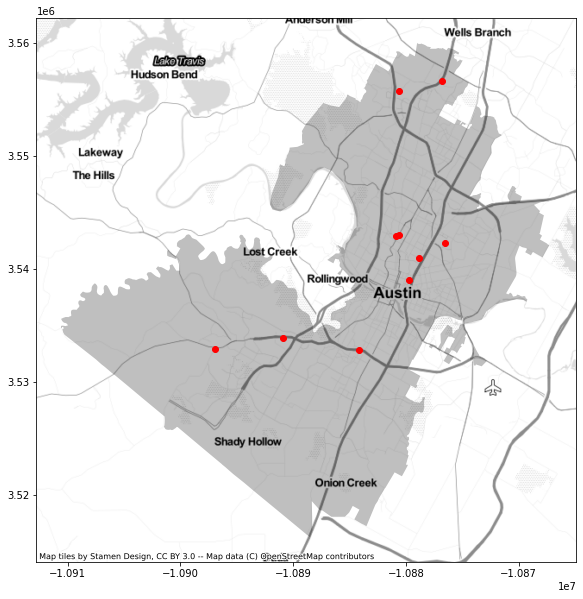

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
aisd_boundary.to_crs('EPSG:3857').plot(color='k', alpha=0.25, ax=ax)
all_coords.to_crs('EPSG:3857').plot(marker='o', color='red', ax=ax)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)

Heart Hospital of Austin is right next to Seton Medical Center (and they probably only take a small fraction of admissions). We'll omit them from analysis.

In [60]:
all_coords.to_file('/Users/kpierce/epimodels/notebooks/AustinGranularModel/Hospitals/AISD_Hospitals.shp')

/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_48899/1459861170.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  all_coords.to_file('/Users/kpierce/epimodels/notebooks/AustinGranularModel/Hospitals/AISD_Hospitals.shp')


## Assign hospitals to ZCTAs

In [63]:
zcta_trimmed_aisd = gpd.read_file('/Users/kpierce/epimodels/notebooks/AustinGranularModel/DataIntegration/zcta_aisd_intersection_2018_2019.shp')


In [65]:
zcta_trimmed_aisd['centroid'] = zcta_trimmed_aisd.centroid

In [82]:
zcta_trimmed_aisd.head()

,GEOID10,zcta_area,overlap_ar,pct_zcta_i,year,geometry,centroid
0,78701,4.481196e+06,4.481196e+06,1.000000,2018,"POLYGON ((1715573.992 7352045.518, 1715575.631...",POINT (1716795.187 7352234.572)
1,78702,1.343599e+07,1.310401e+07,0.975291,2018,"MULTIPOLYGON (((1717314.461 7350949.544, 17173...",POINT (1719461.990 7351528.926)
2,78703,1.513242e+07,1.510991e+07,0.998512,2018,"POLYGON ((1712741.390 7355519.691, 1712891.362...",POINT (1714506.779 7354809.100)
3,78704,2.279053e+07,2.276795e+07,0.999009,2018,"POLYGON ((1711200.712 7349309.808, 1711324.678...",POINT (1714651.520 7349155.589)
4,78705,5.686645e+06,5.686645e+06,1.000000,2018,"POLYGON ((1715596.849 7353802.002, 1715599.304...",POINT (1717111.360 7354891.114)


In [68]:
import numpy as np

In [110]:
all_coords_proj = all_coords.to_crs('EPSG:3083')
all_coords_proj = all_coords_proj[all_coords_proj['ShortName'] != 'Heart Hospital of Austin']

In [111]:
def find_closest_hospital(zcta_centroid, hospital_coord_df):
    
    closest = np.Inf
    closest_hosp = None
    hospital_coords = hospital_coord_df['geometry']
    for i, coord in enumerate(hospital_coords):
        new_dist = coord.distance(zcta_centroid)
        if new_dist < closest:
            closest = new_dist
            closest_hosp = hospital_coord_df['FullName'].iloc[i]

    return closest_hosp

In [112]:
find_closest_hospital(zcta_trimmed_aisd['centroid'][0], all_coords)

"St. David's North Austin Medical Center"

In [113]:
print(zcta_trimmed_aisd['centroid'].iloc[0])

POINT (1716795.18655518 7352234.572390028)


In [114]:
hosp_catchment = {
    'GEOID10': [],
    'HospName': []
}

for i, row in zcta_trimmed_aisd.iterrows():
    hosp_catchment['GEOID10'].append(row['GEOID10'])
    hosp_catchment['HospName'].append(
        find_closest_hospital(zcta_centroid=row['centroid'], hospital_coord_df=all_coords_proj)
    )

In [115]:
hosp_catchment_df = pd.DataFrame.from_dict(hosp_catchment)

In [116]:
hosp_catchment_df['HospName'].value_counts()

Dell Children's Medical Center                     16
Seton Medical Center - Austin                      12
Seton Medical Center - Southwest Austin            12
Baylor, Scott and White Medical Center - Austin    10
Dell Seton Medical Center, UT                       8
St. David's South Austin Medical Center             8
St. David's Medical Center                          6
St. David's North Austin Medical Center             6
Seton Medical Center - Northwest Austin             4
Name: HospName, dtype: int64

In [117]:
hosp_catchment_df

,GEOID10,HospName
0,78701,"Dell Seton Medical Center, UT"
1,78702,"Dell Seton Medical Center, UT"
2,78703,Seton Medical Center - Austin
3,78704,St. David's South Austin Medical Center
4,78705,St. David's Medical Center
...,...,...
77,78758,St. David's North Austin Medical Center
78,78759,Seton Medical Center - Northwest Austin
79,78620,Seton Medical Center - Southwest Austin
80,78652,"Baylor, Scott and White Medical Center - Austin"


In [118]:
zcta_trimmed_aisd_hosp = pd.merge(
    zcta_trimmed_aisd,
    hosp_catchment_df,
    on='GEOID10',
    how='left'
)

In [119]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(10,10))
divider = make_axes_locatable(ax)
ax.set_axis_off()
zcta_trimmed_aisd_hosp.to_crs('EPSG:3857').plot(
    'HospName', ax=ax, legend=False, edgecolor='black', lw=1, alpha=0.1,
    legend_kwds={'bbox_to_anchor': (1.75, 1), 'fontsize': 14}
)
all_coords_proj.to_crs('EPSG:3857').plot(
    'FullName', marker='o', edgecolors='black', lw=2,
    markersize=150, ax=ax, legend=True,
    legend_kwds={'bbox_to_anchor': (1.75, 1), 'fontsize': 14}
)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)

In [164]:
type(zcta_trimmed_aisd_hosp)

geopandas.geodataframe.GeoDataFrame

In [167]:
zcta_trimmed_aisd_hosp.head()

,GEOID10,zcta_area,overlap_ar,pct_zcta_i,year,geometry,centroid,HospName
0,78701,4.481196e+06,4.481196e+06,1.000000,2018,"POLYGON ((1715573.992 7352045.518, 1715575.631...",POINT (1716795.187 7352234.572),"Dell Seton Medical Center, UT"
1,78701,4.481196e+06,4.481196e+06,1.000000,2018,"POLYGON ((1715573.992 7352045.518, 1715575.631...",POINT (1716795.187 7352234.572),"Dell Seton Medical Center, UT"
2,78702,1.343599e+07,1.310401e+07,0.975291,2018,"MULTIPOLYGON (((1717314.461 7350949.544, 17173...",POINT (1719461.990 7351528.926),"Dell Seton Medical Center, UT"
3,78702,1.343599e+07,1.310401e+07,0.975291,2018,"MULTIPOLYGON (((1717314.461 7350949.544, 17173...",POINT (1719461.990 7351528.926),"Dell Seton Medical Center, UT"
4,78703,1.513242e+07,1.510991e+07,0.998512,2018,"POLYGON ((1712741.390 7355519.691, 1712891.362...",POINT (1714506.779 7354809.100),Seton Medical Center - Austin


In [168]:
zcta_trimmed_aisd_hosp_final = zcta_trimmed_aisd_hosp.drop('centroid', axis=1)

In [169]:
zcta_trimmed_aisd_hosp_final.to_file('/Users/kpierce/epimodels/notebooks/AustinGranularModel/DataIntegration/zcta_aisd_intersection_2018_2019_distance_hospital.shp')


# Hospital Catchments from Line List

In [4]:
import geopandas as gpd

/Users/kpierce/epimodels/epi-venv/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [5]:
zcta_trimmed_aisd_hosp_final = gpd.read_file('/Users/kpierce/epimodels/notebooks/AustinGranularModel/DataIntegration/zcta_aisd_intersection_2018_2019_distance_hospital.shp')

In [6]:
zcta_trimmed_aisd_hosp_final.head()

,GEOID10,zcta_area,overlap_ar,pct_zcta_i,year,HospName,geometry
0,78701,4.481196e+06,4.481196e+06,1.000000,2018,"Dell Seton Medical Center, UT","POLYGON ((1715573.992 7352045.518, 1715575.631..."
1,78701,4.481196e+06,4.481196e+06,1.000000,2018,"Dell Seton Medical Center, UT","POLYGON ((1715573.992 7352045.518, 1715575.631..."
2,78702,1.343599e+07,1.310401e+07,0.975291,2018,"Dell Seton Medical Center, UT","MULTIPOLYGON (((1717314.461 7350949.544, 17173..."
3,78702,1.343599e+07,1.310401e+07,0.975291,2018,"Dell Seton Medical Center, UT","MULTIPOLYGON (((1717314.461 7350949.544, 17173..."
4,78703,1.513242e+07,1.510991e+07,0.998512,2018,Seton Medical Center - Austin,"POLYGON ((1712741.390 7355519.691, 1712891.362..."


In [7]:
valid_zips = zcta_trimmed_aisd_hosp_final['GEOID10'].unique()

In [8]:
ll = pd.read_csv('/Users/kpierce/epimodels/notebooks/AustinGranularModel/DataIntegration/resident_zcta_hospital_name.csv')

In [9]:
ll_valid = ll[ll['patient_residence_zipcode'].isin(valid_zips)]

In [10]:
print(ll.shape, ll_valid.shape)

(22401, 2) (10091, 2)


In [11]:
ll_valid['patient_residence_zipcode'].unique()

array(['78744', '78725', '78739', '78741', '78754', '78758', '78747',
       '78748', '78753', '78735', '78733', '78738', '78742', '78721',
       '78745', '78736', '78731', '78756', '78701', '78752', '78723',
       '78724', '78749', '78727', '78746', '78704', '78759', '78702',
       '78751', '78705', '78757', '78610', '78652', '78750', '78703',
       '78722', '78730', '78719', '78737', '78620', '78712'], dtype=object)

In [12]:
ll_valid['hospital'].unique()

array(['SMCA', 'DCMC', "St. David's South Austin Medical Center",
       "St. David's Medical Center ", 'SNW',
       "St. David's North Austin Medical Center", 'DSMCUT',
       'BAYLOR SCOTT & WHITE MEDICAL CENTER - LAKEWAY',
       'BAYLOR SCOTT & WHITE MEDICAL CENTER - PFLUGERVILLE',
       "St. David's Round Rock Medical Center",
       'BAYLOR SCOTT & WHITE MEDICAL CENTER - AUSTIN',
       "St. David's Georgetown Hospital",
       'BAYLOR SCOTT & WHITE MEDICAL CENTER - BUDA',
       'BAYLOR SCOTT & WHITE MEDICAL CENTER - ROUND ROCK', 'SSW', 'SMCH',
       'BAYLOR SCOTT & WHITE EMERGENCY HOSPITAL-CEDAR PARK', 'SMCW',
       'ASB', 'Heart Hospital of Austin', 'SEBD', nan], dtype=object)

In [13]:
zcta_trimmed_aisd_hosp_final['HospName'].unique()

array(['Dell Seton Medical Center, UT', 'Seton Medical Center - Austin',
       "St. David's South Austin Medical Center",
       "St. David's Medical Center", "Dell Children's Medical Center",
       "St. David's North Austin Medical Center",
       'Baylor, Scott and White Medical Center - Austin',
       'Seton Medical Center - Southwest Austin',
       'Seton Medical Center - Northwest Austin'], dtype=object)

In [14]:
import numpy as np

In [15]:
repair_hosp_names = {
    'SMCA': 'Seton Medical Center - Austin', 
    'DCMC': "Dell Children's Medical Center", 
    "St. David's South Austin Medical Center": "St. David's South Austin Medical Center",
    "St. David's Medical Center ": "St. David's Medical Center", 
    'SNW': 'Seton Medical Center - Northwest Austin',
    "St. David's North Austin Medical Center": "St. David's North Austin Medical Center", 
    'DSMCUT': 'Dell Seton Medical Center, UT',
    'BAYLOR SCOTT & WHITE MEDICAL CENTER - LAKEWAY': 'outside area',
    'BAYLOR SCOTT & WHITE MEDICAL CENTER - PFLUGERVILLE': 'outside area',
    "St. David's Round Rock Medical Center": 'outside area',
    'BAYLOR SCOTT & WHITE MEDICAL CENTER - AUSTIN': 'Baylor, Scott and White Medical Center - Austin',
    "St. David's Georgetown Hospital": 'outside area',
    'BAYLOR SCOTT & WHITE MEDICAL CENTER - BUDA': 'outside area',
    'BAYLOR SCOTT & WHITE MEDICAL CENTER - ROUND ROCK': 'outside area', 
    'SSW': 'Seton Medical Center - Southwest Austin', 
    'SMCH': 'outside area', # seton medical center hays
    'BAYLOR SCOTT & WHITE EMERGENCY HOSPITAL-CEDAR PARK': 'outside area', 
    'SMCW': 'outside area', # seton medical center williamson
    'ASB': 'outside area', # ascension seton bastrop 
    'Heart Hospital of Austin': 'Heart Hospital of Austin', 
    'SEBD': 'outside area', # ascension seton edgar b davis
    'nan': 'nan',
    np.nan: 'nan'
}

In [16]:
ll_valid['clean_hosp_name'] = [repair_hosp_names[i] for i in ll_valid['hospital']]

/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_25662/2887878898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ll_valid['clean_hosp_name'] = [repair_hosp_names[i] for i in ll_valid['hospital']]


In [17]:
ll_valid['clean_hosp_name'].value_counts()

St. David's South Austin Medical Center            2134
Dell Seton Medical Center, UT                      1749
Seton Medical Center - Austin                      1678
St. David's Medical Center                         1616
St. David's North Austin Medical Center            1159
outside area                                        936
Dell Children's Medical Center                      317
Seton Medical Center - Northwest Austin             313
Baylor, Scott and White Medical Center - Austin      95
Seton Medical Center - Southwest Austin              73
Heart Hospital of Austin                             20
nan                                                   1
Name: clean_hosp_name, dtype: int64

In [18]:
empirical_catchments = ll_valid.groupby(['patient_residence_zipcode', 'clean_hosp_name']).count().reset_index()

In [19]:
empirical_catchments

,patient_residence_zipcode,clean_hosp_name,hospital
0,78610,"Baylor, Scott and White Medical Center - Austin",3
1,78610,Dell Children's Medical Center,24
2,78610,"Dell Seton Medical Center, UT",42
3,78610,Heart Hospital of Austin,2
4,78610,Seton Medical Center - Austin,42
...,...,...,...
340,78759,Seton Medical Center - Northwest Austin,57
341,78759,St. David's Medical Center,8
342,78759,St. David's North Austin Medical Center,56
343,78759,St. David's South Austin Medical Center,4


In [20]:
simple_catchment = {}
for z in empirical_catchments['patient_residence_zipcode'].unique():
    zcta = empirical_catchments[empirical_catchments['patient_residence_zipcode'] == z]
    try:
        popular_hosp = zcta[zcta['hospital'] == max(zcta['hospital'])]['clean_hosp_name'].item()
        simple_catchment[z] = popular_hosp
    except ValueError:
        print(zcta[zcta['hospital'] == max(zcta['hospital'])])
    

   patient_residence_zipcode                clean_hosp_name  hospital
72                     78719  Dell Seton Medical Center, UT        11
77                     78719                   outside area        11


In [21]:
simple_catchment

{'78610': 'outside area',
 '78620': "St. David's South Austin Medical Center",
 '78652': 'outside area',
 '78701': 'Dell Seton Medical Center, UT',
 '78702': "St. David's Medical Center",
 '78703': 'Seton Medical Center - Austin',
 '78704': "St. David's South Austin Medical Center",
 '78705': "St. David's Medical Center",
 '78712': "St. David's South Austin Medical Center",
 '78721': "St. David's Medical Center",
 '78722': "St. David's Medical Center",
 '78723': "St. David's Medical Center",
 '78724': "St. David's Medical Center",
 '78725': "St. David's Medical Center",
 '78727': "St. David's North Austin Medical Center",
 '78730': 'Seton Medical Center - Northwest Austin',
 '78731': 'Seton Medical Center - Austin',
 '78733': "St. David's South Austin Medical Center",
 '78735': "St. David's South Austin Medical Center",
 '78736': "St. David's South Austin Medical Center",
 '78737': 'Seton Medical Center - Austin',
 '78738': 'outside area',
 '78739': "St. David's South Austin Medical Ce

In [22]:
simple_catchment['78719'] = 'Dell Seton Medical Center, UT'

In [23]:
simple_catchment_df = pd.DataFrame([simple_catchment]).transpose().reset_index()

In [24]:
simple_catchment_df.columns = ['vertex_src', 'vertex_dest']

In [25]:
simple_catchment_df.head()

,vertex_src,vertex_dest
0,78610,outside area
1,78620,St. David's South Austin Medical Center
2,78652,outside area
3,78701,"Dell Seton Medical Center, UT"
4,78702,St. David's Medical Center


In [26]:
simple_catchment_df.to_csv('/Users/kpierce/epimodels/notebooks/AustinGranularModel/DataIntegration/empirical_hospital_catchments.csv')

In [27]:
zcta_trimmed_aisd_hosp_final.head()

,GEOID10,zcta_area,overlap_ar,pct_zcta_i,year,HospName,geometry
0,78701,4.481196e+06,4.481196e+06,1.000000,2018,"Dell Seton Medical Center, UT","POLYGON ((1715573.992 7352045.518, 1715575.631..."
1,78701,4.481196e+06,4.481196e+06,1.000000,2018,"Dell Seton Medical Center, UT","POLYGON ((1715573.992 7352045.518, 1715575.631..."
2,78702,1.343599e+07,1.310401e+07,0.975291,2018,"Dell Seton Medical Center, UT","MULTIPOLYGON (((1717314.461 7350949.544, 17173..."
3,78702,1.343599e+07,1.310401e+07,0.975291,2018,"Dell Seton Medical Center, UT","MULTIPOLYGON (((1717314.461 7350949.544, 17173..."
4,78703,1.513242e+07,1.510991e+07,0.998512,2018,Seton Medical Center - Austin,"POLYGON ((1712741.390 7355519.691, 1712891.362..."


In [28]:
simple_catchment_df.head()

,vertex_src,vertex_dest
0,78610,outside area
1,78620,St. David's South Austin Medical Center
2,78652,outside area
3,78701,"Dell Seton Medical Center, UT"
4,78702,St. David's Medical Center


In [31]:
simple_aisd_hosp = zcta_trimmed_aisd_hosp_final.merge(simple_catchment_df, left_on='GEOID10', right_on='vertex_src')


In [33]:
simple_aisd_hosp.head()

,GEOID10,zcta_area,overlap_ar,pct_zcta_i,year,HospName,geometry,vertex_src,vertex_dest
0,78701,4.481196e+06,4.481196e+06,1.000000,2018,"Dell Seton Medical Center, UT","POLYGON ((1715573.992 7352045.518, 1715575.631...",78701,"Dell Seton Medical Center, UT"
1,78701,4.481196e+06,4.481196e+06,1.000000,2018,"Dell Seton Medical Center, UT","POLYGON ((1715573.992 7352045.518, 1715575.631...",78701,"Dell Seton Medical Center, UT"
2,78701,4.481196e+06,4.481196e+06,1.000000,2019,"Dell Seton Medical Center, UT","POLYGON ((1715573.992 7352045.518, 1715575.631...",78701,"Dell Seton Medical Center, UT"
3,78701,4.481196e+06,4.481196e+06,1.000000,2019,"Dell Seton Medical Center, UT","POLYGON ((1715573.992 7352045.518, 1715575.631...",78701,"Dell Seton Medical Center, UT"
4,78702,1.343599e+07,1.310401e+07,0.975291,2018,"Dell Seton Medical Center, UT","MULTIPOLYGON (((1717314.461 7350949.544, 17173...",78702,St. David's Medical Center


In [32]:
all_coords = gpd.read_file('/Users/kpierce/epimodels/notebooks/AustinGranularModel/Hospitals/AISD_Hospitals.shp')

In [40]:
all_coords.head()

,index,ShortName,FullName,full_addre,address,city,state,zipcode,lat,long,...,match_indi,match_type,matched_ad,tiger_line,tiger_side,state_fips,county_fip,census_tra,census_blo,geometry
0,2,DCMC,Dell Children's Medical Center,4900 Mueller Rd Austin TX 78723,4900 Mueller Rd,Austin,TX,78723,30.301311,-97.705740,...,Match,Non_Exact,"4900 MUELLER BLVD, AUSTIN, TX, 78723",649002685,L,48,453,000309,3007,POINT (-97.70574 30.30131)
1,3,DSMCUT,"Dell Seton Medical Center, UT",1500 Red River St Austin TX 78701,1500 Red River St,Austin,TX,78701,30.275553,-97.734436,...,Match,Non_Exact,"1500 RED RIVER ST, AUSTIN, TX, 78712",642470981,L,48,453,000700,1002,POINT (-97.73444 30.27555)
2,4,Heart Hospital of Austin,Heart Hospital of Austin,3801 N Lamar Blvd Austin TX 78756,3801 N Lamar Blvd,Austin,TX,78756,30.306576,-97.742190,...,Match,Exact,"3801 N LAMAR BLVD, AUSTIN, TX, 78756",639535055,R,48,453,000203,1000,POINT (-97.74219 30.30658)
3,5,SMCA,Seton Medical Center - Austin,1201 W 38th St Austin 78705,1201 W 38th St,Austin,TX,78705,30.306044,-97.744965,...,Match,Exact,"1201 W 38TH ST, AUSTIN, TX, 78705",63942423,L,48,453,000204,3025,POINT (-97.74496 30.30604)
4,7,SSW,Seton Medical Center - Southwest Austin,7900 FM 1826 Austin TX 78737,7900 FM 1826,Austin,TX,78737,30.228003,-97.888870,...,Match,Exact,"7900 FM 1826, AUSTIN, TX, 78737",642470446,R,48,453,031100,2000,POINT (-97.88887 30.22800)


In [103]:
all_coords_catchment = all_coords[all_coords['FullName'].isin(set(simple_aisd_hosp['vertex_dest'].unique()))]
hosp_names = set(list(simple_aisd_hosp['vertex_dest'].unique()) + list(all_coords_catchment['FullName'].unique()))


In [108]:
simple_aisd_hosp['vertex_dest'].unique()

array(['Dell Seton Medical Center, UT', "St. David's Medical Center",
       'Seton Medical Center - Austin',
       "St. David's South Austin Medical Center",
       "St. David's North Austin Medical Center",
       'Seton Medical Center - Northwest Austin', 'outside area'],
      dtype=object)

In [110]:
all_coords['FullName'].unique()

array(["Dell Children's Medical Center", 'Dell Seton Medical Center, UT',
       'Heart Hospital of Austin', 'Seton Medical Center - Austin',
       'Seton Medical Center - Southwest Austin',
       "St. David's Medical Center",
       "St. David's North Austin Medical Center",
       "St. David's South Austin Medical Center",
       'Baylor, Scott and White Medical Center - Austin',
       'Seton Medical Center - Northwest Austin'], dtype=object)

In [104]:
hosp_names

{'Dell Seton Medical Center, UT',
 'Seton Medical Center - Austin',
 'Seton Medical Center - Northwest Austin',
 "St. David's Medical Center",
 "St. David's North Austin Medical Center",
 "St. David's South Austin Medical Center",
 'outside area'}

In [105]:
len(hosp_names)

7

In [106]:
import matplotlib.pyplot as plt
import contextily as cx
from matplotlib import cm
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [111]:
sorted(hosp_names)

['Dell Seton Medical Center, UT',
 'Seton Medical Center - Austin',
 'Seton Medical Center - Northwest Austin',
 "St. David's Medical Center",
 "St. David's North Austin Medical Center",
 "St. David's South Austin Medical Center",
 'outside area']

In [115]:
palette = dict(zip(sorted(hosp_names),
               [cm.tab20(x) for x in range(len(hosp_names))]))

In [116]:
range(len(palette))

range(0, 7)

In [121]:
palette = dict(zip(sorted(hosp_names),
               [cm.tab20(x) for x in range(len(hosp_names))]))
cmap_shape=ListedColormap(
    [color for hosp, color in palette.items() if hosp in sorted(simple_aisd_hosp['vertex_dest'].unique())]
)
cmap_point=ListedColormap(
    [color for hosp, color in palette.items() if hosp in sorted(all_coords_catchment['FullName'].unique())]
)

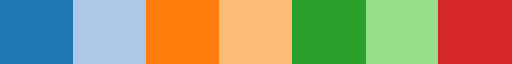

In [122]:
cmap_shape

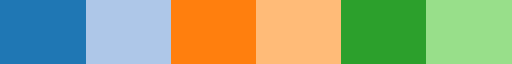

In [123]:
cmap_point

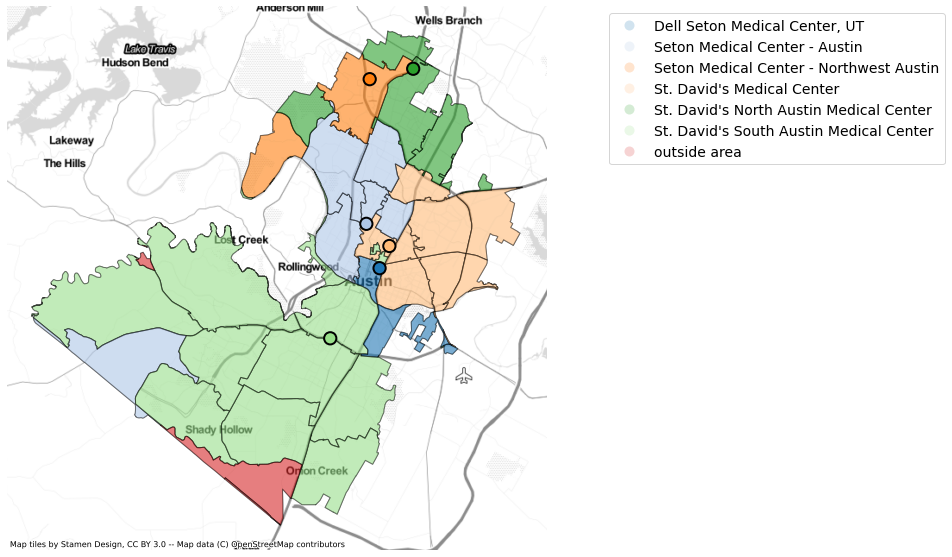

In [129]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
divider = make_axes_locatable(ax)
ax.set_axis_off()
simple_aisd_hosp_sorted = simple_aisd_hosp.sort_values('vertex_dest')
simple_aisd_hosp.to_crs('EPSG:3857').plot(
    'vertex_dest', ax=ax, legend=True, edgecolor='black', lw=1, alpha=0.2,
    cmap=cmap_shape, categorical=True,
    legend_kwds={'bbox_to_anchor': (1.75, 1), 'fontsize': 14}
)


all_coords_catchment_sorted = all_coords_catchment.sort_values('FullName')
all_coords_catchment_sorted.to_crs('EPSG:3857').plot(
    'FullName', marker='o', edgecolors='black', lw=2,
    markersize=150, ax=ax, legend=False,
    cmap=cmap_point, categorical=True,
    legend_kwds={'bbox_to_anchor': (1.75, 0.5), 'fontsize': 14}
)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
